<a href="https://colab.research.google.com/github/SurabhiSharma-hub/Suru-puddle/blob/main/Modelling_Zn_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np

df = pd.read_excel('/content/SOIL_LEDS_DATA_Zn.xlsx')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample     25 non-null     int64  
 1   L1 (mV)    25 non-null     float64
 2   L4         25 non-null     float64
 3   L7         25 non-null     float64
 4   Target_Zn  25 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.1 KB


,sample,L1 (mV),L4,L7,Target_Zn
0,1,15.80,70.07,77.93,5.399866
1,2,20.87,63.87,70.33,4.360447
2,3,21.53,63.20,70.47,50.509045
3,4,21.93,61.73,69.40,8.461403
4,5,20.80,64.87,71.27,4.434842


In [17]:
import pandas as pd


df = pd.read_excel('/content/SOIL_LEDS_DATA_Zn.xlsx')
c1=df.drop(['sample'], axis=1)
c1.head()



,L1 (mV),L4,L7,Target_Zn
0,15.80,70.07,77.93,5.399866
1,20.87,63.87,70.33,4.360447
2,21.53,63.20,70.47,50.509045
3,21.93,61.73,69.40,8.461403
4,20.80,64.87,71.27,4.434842


Data visualization

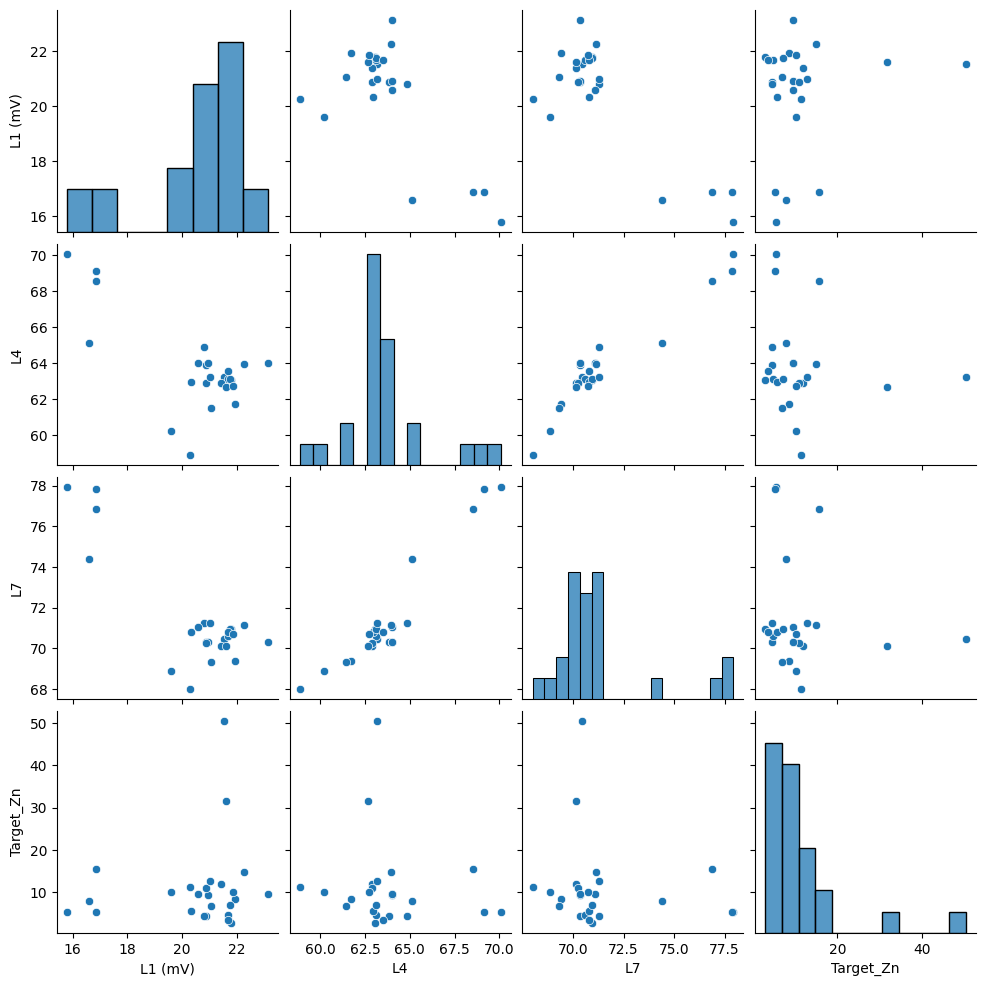

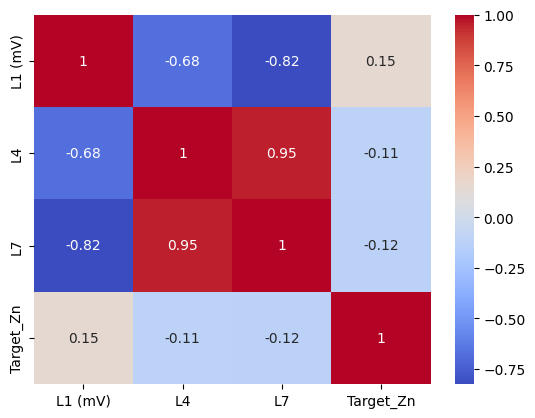

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

#Pairplot
sns.pairplot(c1)
plt.show()

#Correlation matrix
correlation_matrix = c1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [19]:
X=c1.drop('Target_Zn',axis=1)
y=c1['Target_Zn']

print('shape of X=',X.shape)
print('shape of y=',y.shape)

shape of X= (25, 3)
shape of y= (25,)


feature scalling

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# X and y are feature matrix and target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('shape of X_train =',X_train.shape)
print('shape of X_test =',X_test.shape)
print('shape of y_train =',y_train.shape)
print('shape of y_test =',y_test.shape)

#Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)
print(X_test_scaled)

#Min-Max Scalling

scaler1 = MinMaxScaler()
X_train_scaled1 = scaler.fit_transform(X_train)
X_test_scaled1 = scaler.transform(X_test)
print(X_train_scaled1)
print(X_test_scaled1)

shape of X_train = (20, 3)
shape of X_test = (5, 3)
shape of y_train = (20,)
shape of y_test = (5,)
[[-2.16952276  2.67541227  2.86408217]
 [-0.11490424 -0.37741852 -0.22737752]
 [ 0.20575876  0.08543002 -0.43289181]
 [ 0.28295541 -0.24447266 -0.02186322]
 [ 0.24138798  0.14944099 -0.43289181]
 [ 0.59768021 -0.24447266 -0.37167479]
 [ 0.52048356 -0.40696204 -0.5203447 ]
 [-2.16952276  2.37997703  2.42681771]
 [ 0.83520836 -0.96828899 -0.83954775]
 [ 0.16419134  0.57782208 -0.02186322]
 [ 0.63924764 -0.50544045 -0.5203447 ]
 [ 0.68081507 -0.08198328 -0.22737752]
 [ 0.79957914 -0.47589693 -0.25798603]
 [ 0.03948906  0.14944099 -0.10931611]
 [-0.54839312 -1.72164884 -1.07129791]
 [-2.32985426  0.70584402  1.34677452]
 [ 0.32452284 -1.09631092 -0.87015626]
 [ 0.20575876 -0.40696204 -0.45912768]
 [ 1.03710729  0.11497355 -0.08308025]
 [ 0.75801172 -0.30848363 -0.17053314]]
[[ 0.68081507 -0.2789401  -0.31483041]
 [ 0.71644429 -0.2789401  -0.17053314]
 [-2.80491057  3.1382608   2.89031803]
 [

Feature Selection

In [36]:
from sklearn.feature_selection import SelectKBest, f_regression

# Applying SelectKBest with f_regression
select_k_best = SelectKBest(score_func=f_regression, k=2)
X_train_k_best = select_k_best.fit_transform(X_train_scaled, y_train)
X_test_k_best = select_k_best.transform(X_test_scaled)

print(X_train_k_best)
print(X_test_k_best)

selected_features = select_k_best.get_support(indices=True)

print("Selected features:", X.columns[selected_features])


[[-2.16952276  2.86408217]
 [-0.11490424 -0.22737752]
 [ 0.20575876 -0.43289181]
 [ 0.28295541 -0.02186322]
 [ 0.24138798 -0.43289181]
 [ 0.59768021 -0.37167479]
 [ 0.52048356 -0.5203447 ]
 [-2.16952276  2.42681771]
 [ 0.83520836 -0.83954775]
 [ 0.16419134 -0.02186322]
 [ 0.63924764 -0.5203447 ]
 [ 0.68081507 -0.22737752]
 [ 0.79957914 -0.25798603]
 [ 0.03948906 -0.10931611]
 [-0.54839312 -1.07129791]
 [-2.32985426  1.34677452]
 [ 0.32452284 -0.87015626]
 [ 0.20575876 -0.45912768]
 [ 1.03710729 -0.08308025]
 [ 0.75801172 -0.17053314]]
[[ 0.68081507 -0.31483041]
 [ 0.71644429 -0.17053314]
 [-2.80491057  2.89031803]
 [ 1.54779282 -0.43289181]
 [-0.15053347 -1.45171798]]
Selected features: Index(['L1 (mV)', 'L7'], dtype='object')


model selection

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'fit_intercept': True}
Tuned Linear Regression - Mean Squared Error: 32.98437794465765
Tuned Linear Regression - R² Score: -4.2505456196158695


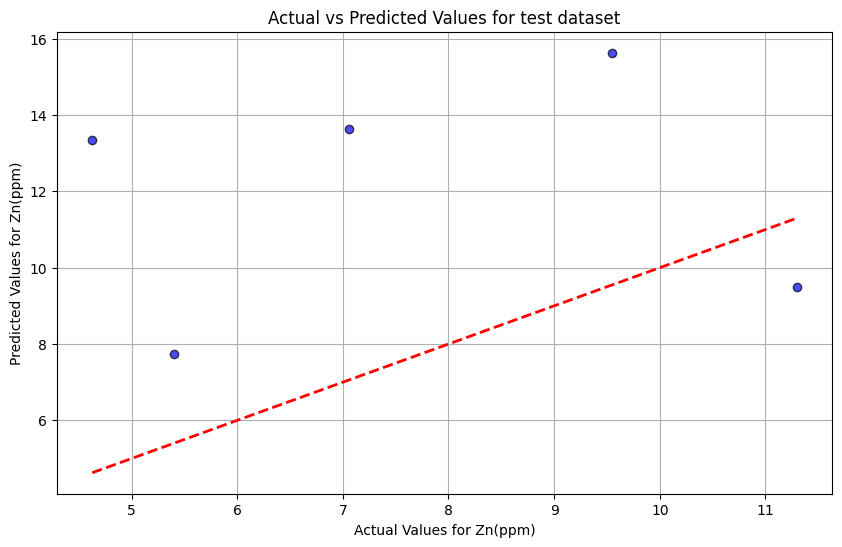

-4.2505456196158695


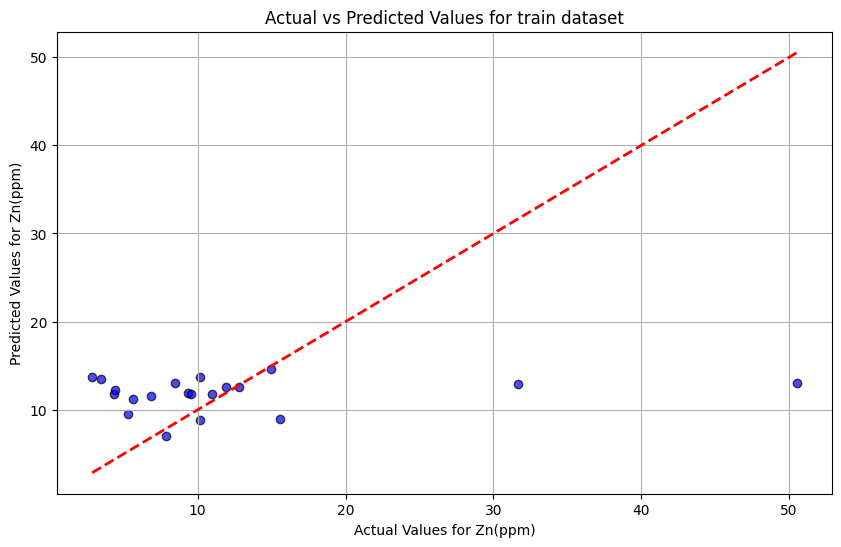

R² Score (Test Data): -4.2505456196158695
R² Score (Training Data): 0.02994154461516474


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#parameter grid for Linear Regression
param_grid = {
    'fit_intercept': [True, False]
}


lr_model = LinearRegression()

#Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_k_best, y_train)

# Getting best parameters & best estimator
print(f'Best parameters: {grid_search.best_params_}')
best_lr_model = grid_search.best_estimator_

# Make predictions with the best model
lr_pred_tuned = best_lr_model.predict(X_test_k_best)

# Evaluation of tuned model
lr_mse_tuned = mean_squared_error(y_test, lr_pred_tuned)
lr_r2_tuned = r2_score(y_test, lr_pred_tuned)
print(f'Tuned Linear Regression - Mean Squared Error: {lr_mse_tuned}')
print(f'Tuned Linear Regression - R² Score: {lr_r2_tuned}')

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_k_best, y_train)
lr_pred = lr_model.predict(X_test_k_best)
lr_model.score(X_train_k_best,y_train)
lr_model.score(X_test_k_best,y_test)

y_test = np.array(y_test)
y_pred_tuned = np.array(lr_pred_tuned)
y_train = np.array(y_train)
y_train_pred = lr_model.predict(X_train_k_best)
#plotting Taget Conc. of Zn for train and test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tuned, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

plt.xlabel('Actual Values for Zn(ppm)')
plt.ylabel('Predicted Values for Zn(ppm)')
plt.title('Actual vs Predicted Values for test dataset')
plt.grid(True)
plt.show()
print(lr_model.score(X_test_k_best,y_test))


plt.figure(figsize=(10, 6))
plt.scatter(y_train[:20], y_train_pred, color='blue', edgecolor='k', alpha=0.7)20 samples
plt.plot([min(y_train[:20]), max(y_train[:20])], [min(y_train[:20]), max(y_train[:20])], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values for Zn(ppm)')
plt.ylabel('Predicted Values for Zn(ppm)')
plt.title('Actual vs Predicted Values for train dataset')
plt.grid(True)
plt.show()

print(f"R² Score (Test Data): {lr_model.score(X_test_k_best, y_test)}")
print(f"R² Score (Training Data): {lr_model.score(X_train_k_best, y_train)}")



In [33]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svr_model = SVR()

grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_k_best, y_train)

print(f'Best parameters: {grid_search.best_params_}')
best_svr_model = grid_search.best_estimator_

svr_pred_tuned = best_svr_model.predict(X_test_k_best)

svr_mse_tuned = mean_squared_error(y_test, svr_pred_tuned)
svr_r2_tuned = r2_score(y_test, svr_pred_tuned)
print(svr_mse_tuned)
print(svr_r2_tuned)


ValueError: Found input variables with inconsistent numbers of samples: [20, 25]

In [1]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# PLSR model
pls = PLSRegression()

pls.fit(X_train_scaled, y_train)

pls = PLSRegression(n_components=3)

X_train_pls = pls.fit_transform(X_train_scaled, y_train)[0]
X_test_pls = pls.transform(X_test_scaled)

param_grid = {
    'n_components': [2, 3]
}

#Grid Search with Cross-Validation
pls = PLSRegression()
grid_search = GridSearchCV(estimator=pls, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print(f'Best parameters: {grid_search.best_params_}')
best_pls_model = grid_search.best_estimator_

pls_pred_tuned = best_pls_model.predict(X_test_scaled)

pls_mse_tuned = mean_squared_error(y_test, pls_pred_tuned)
pls_r2_tuned = r2_score(y_test, pls_pred_tuned)
print(f'Tuned PLS Regression - Mean Squared Error: {pls_mse_tuned}')
print(f'Tuned PLS Regression - R² Score: {pls_r2_tuned}')



NameError: name 'X_train_scaled' is not defined